# MATH637-011 Homework 3 (10% total grade)

## **Deadline: 10/27/2023 11:59 PM**

In this homework, we will train and test a simple convolutional neural network on the [Fashion MNIST dataset](https://www.tensorflow.org/tutorials/keras/classification) using Keras. This dataset contains grayscale images of 10 different fashion categories.


## 1. Download and load dataset (1% total grade)

Read [this API](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) and use the function `fashion_mnist.load_data()` to download and load the data into the variables: `X_train, Y_train, X_test, Y_test`.

You should make sure that the shapes of `X_train, Y_train, X_test, Y_test` are `(60000, 28, 28) (60000,), (10000, 28, 28), (10000,)` respectively.

In [ ]:
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 2. Convert pixel values to range [0, 1] (1% total grade)

The pixel values of your loaded images are integers in `[0, 255]`, while classifiers usually require real-valued pixels in `[0, 1]` to work well.

Write code to convert the train and test images' pixels in `X_train` and `X_test` to range `[0, 1]` by dividing all pixels by `255.0`.

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## 3. Inspect some train images and labels (1% total grade)

Given a variable `img_id`, write code to:
*   Plot the input image at index `img_id` in the training set.
*   And print out the label string of this image.

You can vary `img_id` to see different input images and the corresponding labels. (Choose a value for `img_id` to run the code; you don't have to write a function).

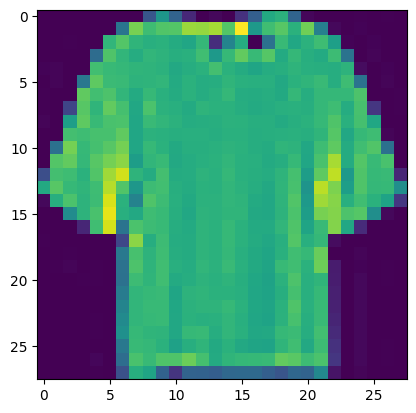

Shirt


In [ ]:
import matplotlib.pyplot as plt

# List of label strings are
label_str = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

img_id = 77
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label])

## 4. Reshape input images (1% total grade)

To train and test a CNN model,
each input image must have 3 dimensions (height, width, channel). However, the images in `X_train` and `X_test` only have 2 dimensions currently (height, width). Write code to reshape `X_train` and `X_test` to include one additional dimension for the channel.

The new shapes for `X_train` and `X_test` should be `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`.

In [ ]:
import numpy as np

# expand_dims is used to add Dimension and "axis= -1" adds the dimension at the end
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


## 5. Convert label vectors into one-hot encodings (1% total grade)

To train/test a model with Keras, the labels have to be in one-hot encoding format. Write code to convert the train and test label vectors into one-hot encodings.

In [ ]:
import keras
num_classes=10 #Since it contains 10 labels
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

## 6. Define the CNN model (2% total grade)

Write code to define a CNN model with:
*   1 convolutional layer with 16 3x3 filters, `relu` activation, and `same` padding. Be sure to set the correct `input_shape` for this dataset.
*   1 max pooling layer with a 2x2 filter.
*   Then the resulting tensor is flattened into a vector.
*   The flattened vector is put through a Dense layer with 50 hidden nodes and `relu` activation.
*   Finally, a Dense output layer with 10 output labels and `softmax` activation.

In [ ]:
from keras.src.layers.serialization import activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
import keras.layers as layers
model = Sequential()
model.add(Conv2D(16, kernel_size =(3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)               

## 7. Compile the model (1% total grade)

Write code to compile the model with `loss='categorical_crossentropy'`, `optimizer='sgd'`, and `metrics=['accuracy']`.

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 8. Train the model (1% total grade)

Write code to train the model for 10 epochs and with batch_size=128.

In [ ]:
batch_size = 128
epochs = 10

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.3018 - accuracy: 0.5786 - val_loss: 0.7874 - val_accuracy: 0.7312
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.7178 - accuracy: 0.7494 - val_loss: 0.6326 - val_accuracy: 0.7775
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.6243 - accuracy: 0.7768 - val_loss: 0.5806 - val_accuracy: 0.7905
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.5785 - accuracy: 0.7908 - val_loss: 0.5590 - val_accuracy: 0.7873
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5494 - accuracy: 0.7996 - val_loss: 0.5237 - val_accuracy: 0.8093
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5256 - accuracy: 0.8110 - val_loss: 0.5070 - val_accuracy: 0.8122
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5059 - accuracy: 0.8183 - val_loss: 0.4982 - val_accuracy: 0.8143
Epoch 

## 9. Evaluate the trained model on test set (1% total grade)

Write code to compute and print out the accuracy of the model on test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.4891 - accuracy: 0.8240
0.8240000009536743


## 10. Bonus: Plot some test images and compare true labels with predicted labels

(This is just for fun though. If you make a mistake somewhere then I can consider this for more credits).

Given the `img_id` variable:
*   Plot the image with index `img_id` in your **test set**.
*   Print out the true label string of the image.
*   Print out the predicted label string of the image (computed from your trained model above).

See below for a sample output.

In [ ]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


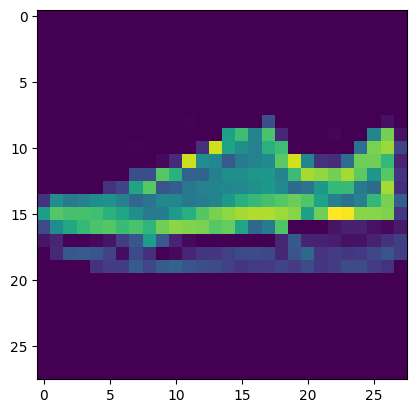

True Label:  Sneaker
Predicted Label:  Sneaker


In [ ]:
img_id = 9

img = X_test[img_id]
ind = Y_test[img_id]
plt.imshow(img)
plt.show()

# pred[img_id] gives the predicted Output.
# But both pred[img_id] & Y_test[img_id] are in One Hot Code. To convert them to labels, can use label_str[np.argmax(true_OP or Pred_OP)]
print("True Label: ", label_str[np.argmax(ind)])
print("Predicted Label: ", label_str[np.argmax(pred[img_id])])